# **Exploratory data analysis**

## General info

**Project:** Heart Failure Prediction

**Author:** Maria (GitHub - Stork656)

**Date:** 2026

**Data source:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

**Goal:** To explore the dataset and identify appropriate data preprocessing steps for subsequent machine learning models in heart failure prediction.

## Table of contents

1. [General Info](#General-info)
2. [Data Loading and Setup](#Data-Loading-and-Setup)
3. [Dataset Overview](#Dataset-Overview)
4. [Target Variable Analysis](#Target-Variable-Analysis)
5. [Feature Analysis](#Feature-Analysis)
6. [Summary](#Summary)

#### Data Loading and Setup

In this section, the dataset is loaded and prepared for further exploratory analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from pathlib import Path

In [2]:
path = Path('../data/raw/heart-diseases.csv')
df = pd.read_csv(path) 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122,N,0.0,Up,0.0


In [3]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110.0,264.0,0.0,Normal,132,N,1.2,Flat,1.0
914,68,M,ASY,144.0,193.0,1.0,Normal,141,N,3.4,Flat,1.0
915,57,M,ASY,130.0,131.0,0.0,Normal,115,Y,1.2,Flat,1.0
916,57,F,ATA,130.0,236.0,0.0,LVH,174,N,0.0,Flat,1.0
917,38,M,NAP,138.0,175.0,0.0,Normal,173,N,0.0,Up,0.0


**Attribute Information**

**Age**

Age of the patient 
* years

**Sex**

Sex of the patient 
* M - male
* F - female

**ChestPainType**

Chest pain type
* TA - Typical Angina
* ATA - Atypical Angina
* NAP - Non-Anginal Pain
* ASY - Asymptomatic

**RestingBP**

Resting blood pressure 
* mm Hg

**Cholesterol**

Serum cholesterol 
* mm/dl

**FastingBS**

Fasting blood sugar 
* 1 - if FastingBS > 120 mg/dl
* 0 - otherwise

**RestingECG**

Resting electrocardiogram results
* Normal - normal
* ST - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* LVH - showing probable or definite left ventricular hypertrophy by Estes' criteria
  
**MaxHR**

Maximum heart rate achieved 
* Numeric value between 60 and 202

**ExerciseAngina**

Exercise-induced angina 
* Y - Yes
* N - No
  
**Oldpeak** 

Oldpeak = ST 
* Numeric value measured in depression

**ST_Slope**

The slope of the peak exercise ST segment 
* Up - upsloping
* Flat - flat
* Down - downsloping

**HeartDisease** 

Output class 
* 1 - heart disease
* 0 - Normal

#### Dataset Overview

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    913 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      5
dtype: int64

In [7]:
(df.isna().sum() / len(df) * 100).round(2)

Age               0.00
Sex               0.00
ChestPainType     0.00
RestingBP         0.11
Cholesterol       0.11
FastingBS         0.11
RestingECG        0.00
MaxHR             0.00
ExerciseAngina    0.00
Oldpeak           0.00
ST_Slope          0.00
HeartDisease      0.54
dtype: float64

In [8]:
df.duplicated().sum()

np.int64(0)

* The dataset consists of 918 rows and 12 columns.
* The features include numerical, categorical, and binary variables (see details in the Feature Analysis section - [Feature Analysis](#Feature-Analysis).
* Missing values are present in the RestingBP, Cholesterol, FastingBS columns, as well as in the target variable HeartDisease. However, their proportion is less than 1% of the data.
* No duplicate records.

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,917.000000,917.000000,918.000000,918.000000,913.000000
mean,53.510893,132.355507,198.749182,0.233370,136.809368,0.887364,0.555312
std,9.432617,18.482498,109.433178,0.423206,25.460334,1.066570,0.497204
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* The age of the patients ranges from 28 to 77 years, with an average age of approximately 54 years.
* The minimum values of RestingBP and Cholesterol are equal to 0, which is physiologically impossible. Therefore, these values should be treated as missing values or potential outliers.
* The maximum values of these features are significantly higher than the 75th percentile. However, they are likely to reflect severe disease cases rather than true outliers.
* The distribution of Oldpeak is right-skewed, which is expected since most individuals have a small ST depression after exercise. However, negative values may indicate potential outliers.
* The target variable HeartDisease contains two classes and is nearly evenly distributed, indicating a balanced dataset for classification tasks.
* The comparison of mean and median values for numerical features suggests that most patients fall within moderate ranges of the measured variables.

#### Target Variable Analysis

              Count  Percent
HeartDisease                
1.0             507    55.53
0.0             406    44.47


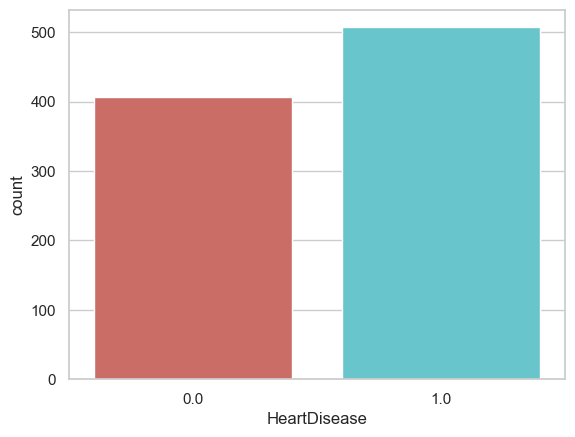

In [10]:
counts = df['HeartDisease'].value_counts()
percent = df['HeartDisease'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': counts, 'Percent': percent.round(2)}))

sns.set(style="whitegrid")
y_data = pd.DataFrame(df['HeartDisease'])
sns.countplot(x='HeartDisease',
              data=y_data,
              hue='HeartDisease',
              palette='hls',
              legend=False)
plt.show()

The target variable contains two classes:
* 0 – no heart disease (406 patients, 44.3%)
* 1 – heart disease present (507 patients, 55.3%)

The dataset shows a slight class imbalance, but it is not critical, so no additional class balancing is required.

#### Feature Analysis

In [11]:
lst_cat, lst_num, lst_bin = [], [], []
target = 'HeartDisease'

for col in df.drop(columns = [target]).columns:
    if df[col].nunique() == 2:
        lst_bin.append(col)
    elif is_numeric_dtype(df[col]):
        lst_num.append(col)
    else:
        lst_cat.append(col)

print(f'Target: {target}\n')
print(f'Numerical features: {', '.join(lst_num)}\n')
print('Categorical features:')
for f in lst_cat:
    print(f'{df[f].value_counts()}\n')

print('Binary features:')
for f in lst_bin:
    print(f'{df[f].value_counts()}\n')

Target: HeartDisease

Numerical features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

Categorical features:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Binary features:
Sex
M    725
F    193
Name: count, dtype: int64

FastingBS
0.0    703
1.0    214
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64



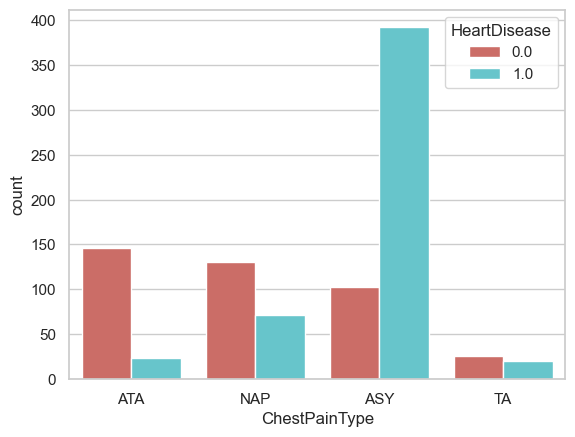

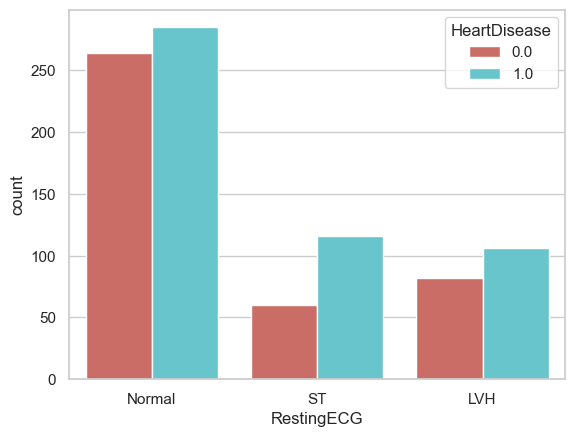

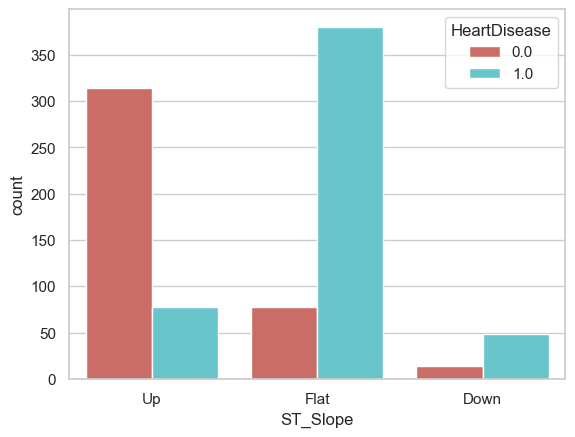

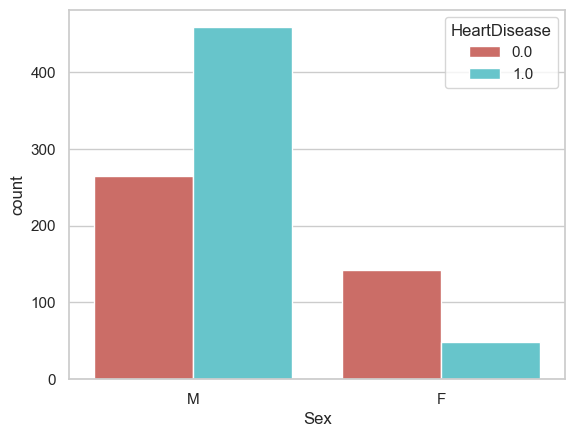

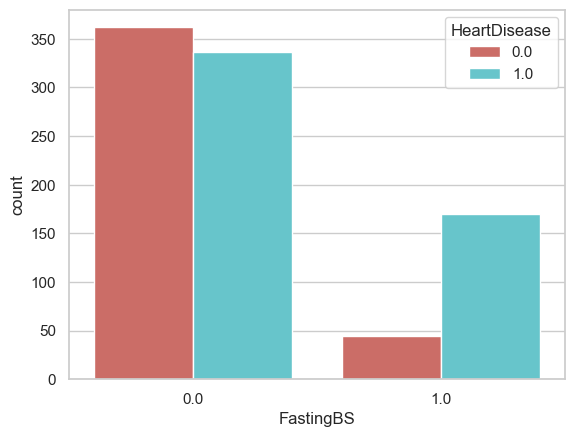

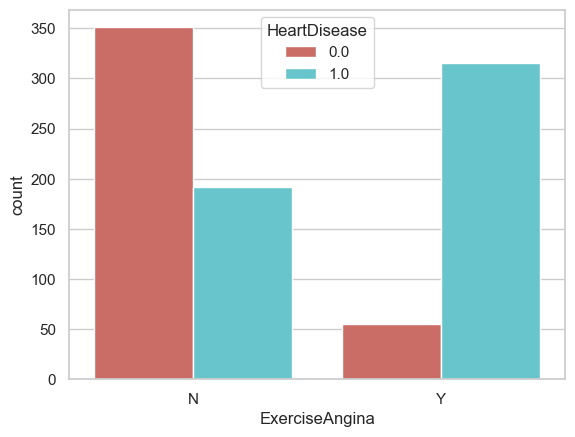

In [12]:
for col in lst_cat + lst_bin:
    sns.countplot(x=col, 
                  hue='HeartDisease', 
                  data=df, 
                  palette='hls')
    plt.show()

**Categorical features**

**ChestPainType**

Most patients in the dataset have asymptomatic chest pain, while typical angina is the least frequent category.
* Asymptomatic chest pain (ASY) shows a strong association with the presence of heart disease.
* Atypical angina (ATA) and non-anginal pain (NAP) are associated with a lower risk of heart disease.
* Typical angina (TA) shows a weak association with the target variable.

**RestingECG**

Most patients have normal resting ECG results.
* ST abnormalities (ST) and left ventricular hypertrophy (LVH) show a stronger association with heart disease.
* Normal resting ECG results are associated with a lower risk of heart disease.

**ST_Slope**

The least frequent category in the dataset is downsloping ST segment.
* Upsloping ST segment (Up) shows a strong inverse association with heart disease.
* Flat ST segment (Flat) shows a strong positive association with heart disease.
* Downsloping ST segment (Down) shows a positive association with heart disease.


**Binary features**

**Sex**

The dataset contains significantly more male patients than female patients.
* Male sex shows a positive association with heart disease.
* Female sex is associated with a lower risk of heart disease.

**Fasting BS**

Most patients have normal fasting blood sugar levels.
* Normal fasting blood sugar levels show a weak association with heart disease.
* Elevated fasting blood sugar (>120 mg/dl) shows a strong association with heart disease.

**ExerciseAngina**

Most patients do not experience exercise-induced angina.
* Absence of exercise-induced angina is associated with a lower risk of heart disease.
* Presence of exercise-induced angina shows a strong positive association with heart disease.

<Axes: >

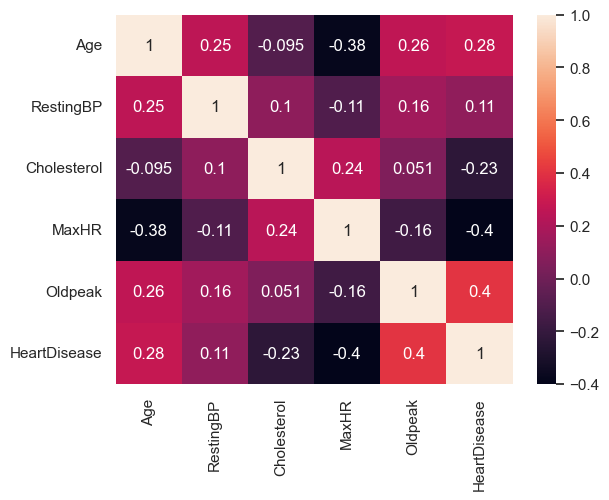

In [13]:
sns.heatmap(df[lst_num + [target]].corr(), annot=True)

**Numerical features**

Some features (e.g., RestingBP) show weak linear correlation but are known clinical risk factors. This may indicate either a non-linear relationship or limited relevance of this feature specifically for heart **failure** prediction.

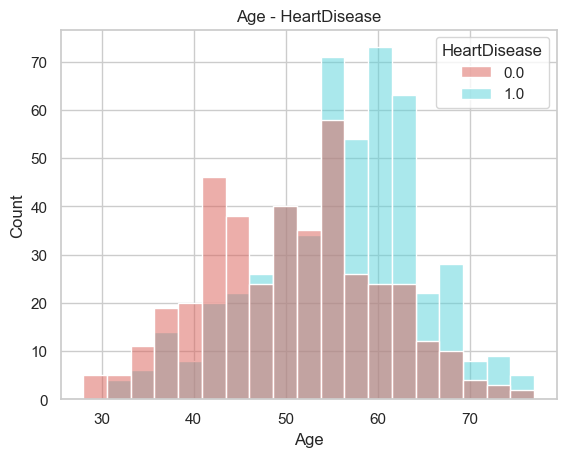

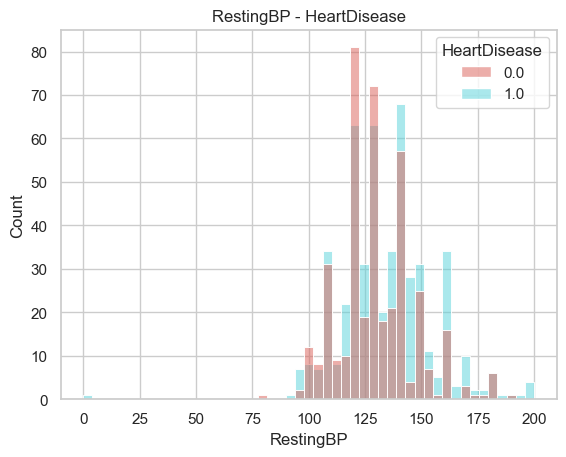

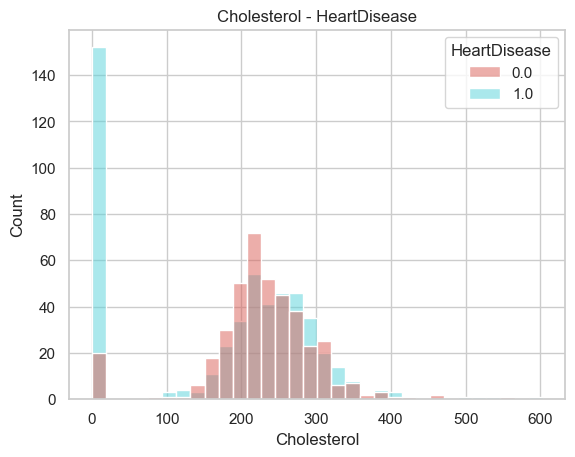

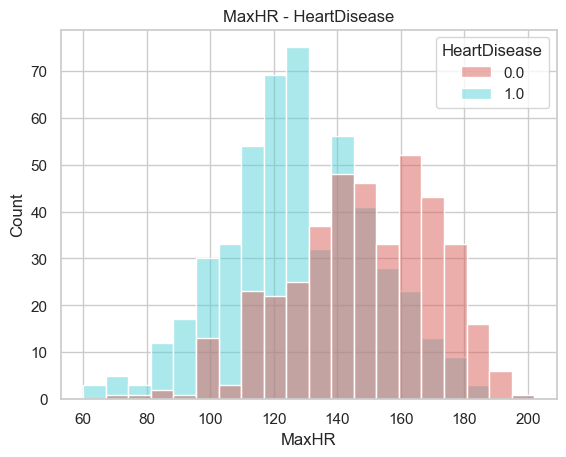

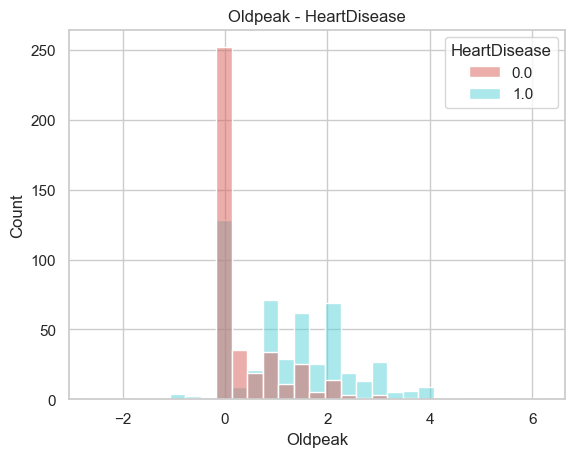

In [14]:
for col in lst_num:
    sns.histplot(x=col,
                 data=df,
                 hue='HeartDisease',
                 palette='hls')
    plt.title(f'{col} - HeartDisease')
    plt.show()

**Age**
* Age shows a positive correlation with heart disease risk: the risk increases with age.

**RestingBP**
* Higher resting blood pressure (>140 mmHg) is associated with an increased risk of heart disease.
* Very low values (<100 mmHg) are also associated with increased risk, indicating a non-linear relationship.

**Cholesterol**
* Very high cholesterol levels (>300 mg/dl) are associated with increased risk.
* Heart disease is also present at low cholesterol levels (<150 mg/dl), suggesting a non-linear relationship. 

**MaxHR**
* Lower maximum achieved heart rate is associated with a higher risk of heart disease, indicating a negative correlation. But, there is a jump, at very high MaxHR.

**Oldpeak**
* Higher ST depression values are associated with increased risk of heart disease, showing a positive correlation.

All features provide relevant information for heart failure disease prediction, and there is no strong justification for removing any of them at this stage.

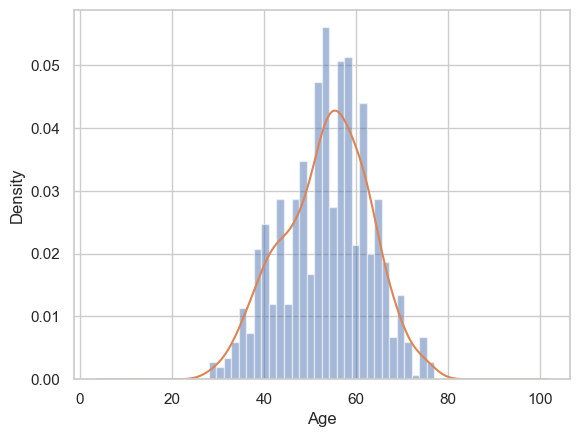

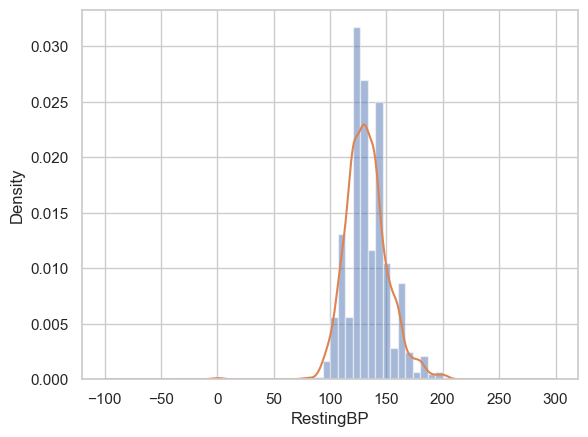

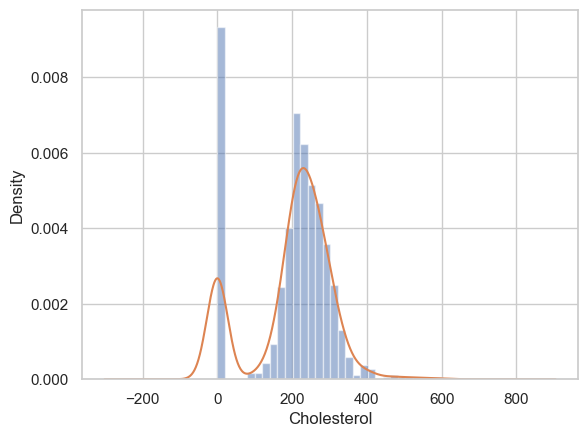

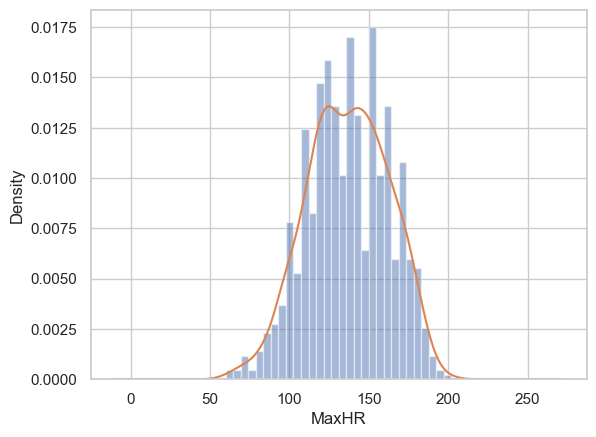

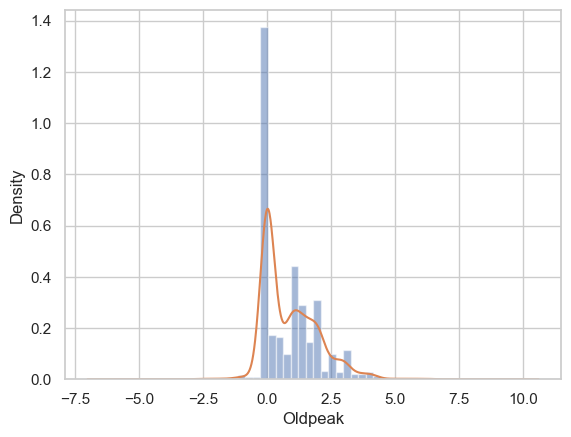

In [17]:
for col in lst_num:
    df[col].plot(kind='hist',
                 density=True,
                 bins=30,
                 alpha=0.5)
    df[col].plot(kind='kde')
    plt.xlabel(col)
    plt.show()

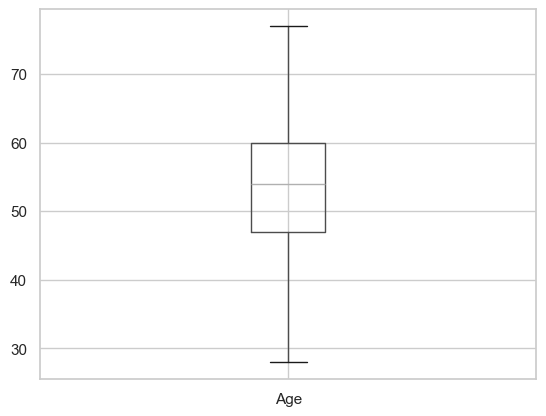

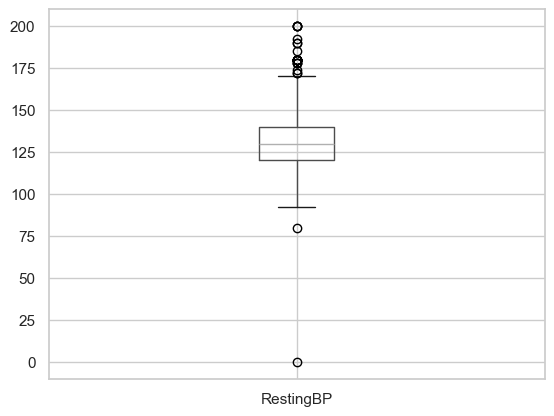

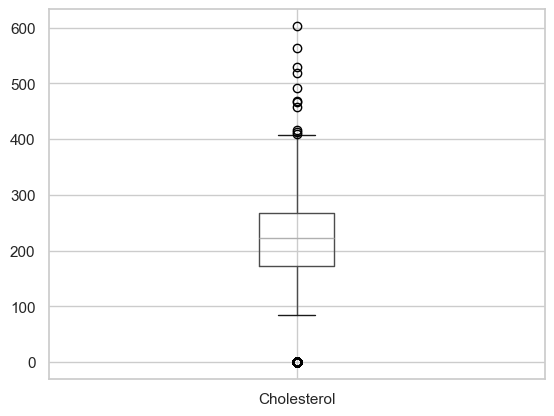

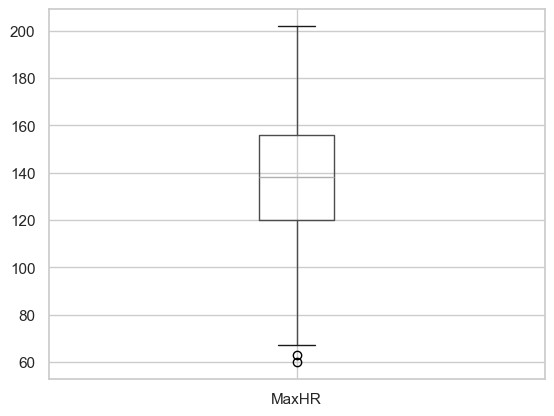

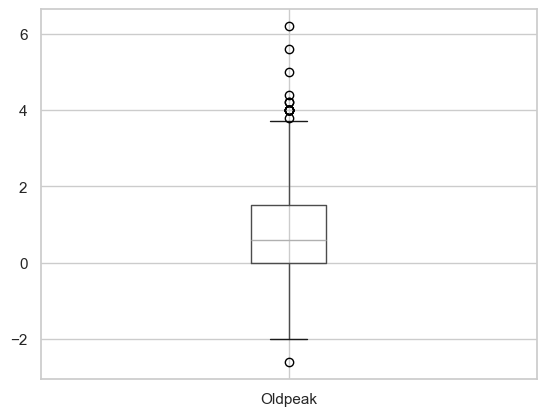

In [18]:
for col in lst_num:
    df[[col]].boxplot(grid = True)
    plt.show()

**Age**
* Normally distributed, no extreme values.

**RestingBP**
* Distribution is roughly normal, with low variance.
* Extreme values, except 0, may indicate severe disease cases rather than true outliers, so they should be kept.
* The  value of RestingBP equal to 0, which is physiologically impossible. Needs to be removed.

**Cholesterol**
* The value of Cholesterol equal to 0, which is physiologically impossible. Many values are 0, probably representing missing data encoded as 0. Needs to replaced with NaN.
* Other extreme values should be kept, as they may indicate severe disease.

**MaxHR**
* Distribution is approximately normal.
* Extreme values probably indicate severe cases of the disease.

**Oldpeak**
* Distribution is right-skewed, which is normal for this feature.
* Negative values may be rare cases or outliers — leave them for now.
* Other extreme values may indicate severe ischemia.

## Summary

In summary, the following steps were identified for data preprocessing:
1. Handle missing values and replace 0 in Cholesterol.
2. Handle zero outlier in RestingBP.
3. Encode categorical variables.
4. Normalize numerical features.